In [2]:
import torch

In [12]:
x_ten = torch.rand(3,3)
x_ten[0,0]

tensor(0.0210)

In [38]:
x = torch.randn(3, requires_grad=True)

In [46]:
y=x*x+2
z=y.sum()
z.backward()
print(x.grad)

tensor([19.5300,  4.1950,  2.0058])


In [86]:
t = torch.ones(4, 4)
t[:,1] = 0
tf = torch.flip(t,dims=[1])
# print(t,tf)
res = t*t.T - tf
res

tensor([[ 0., -1.,  1.,  0.],
        [-1., -1.,  0., -1.],
        [ 0., -1.,  1.,  0.],
        [ 0., -1.,  1.,  0.]])

In [90]:
res.sum()

tensor(-3.)

Cells below is almost [tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) but insead of FashionMNIST, data from MNIST is is loaded.

In [91]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [98]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

1


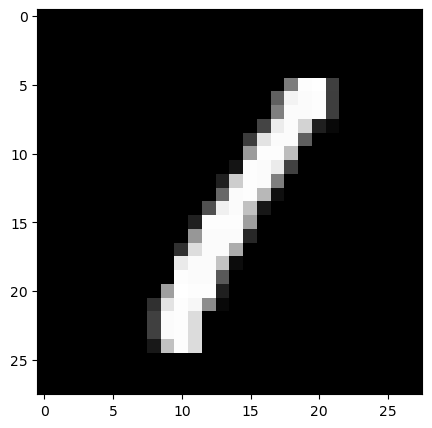

In [125]:
# preview data by choosing i-th element form dataset:
ith = 3
figure = plt.figure(figsize=(5, 5))
img, label = training_data[ith]
print(label)
plt.imshow(img.squeeze(), cmap="gray") # .squeeze() like in numpy it removed dims =1
plt.show()

In [130]:
# dictionary of strings, in code below str(label) would also work, but for categorical data e.g. FashionMNIST dict is useful.
labels_map = {i : str(i) for i in range(10)}

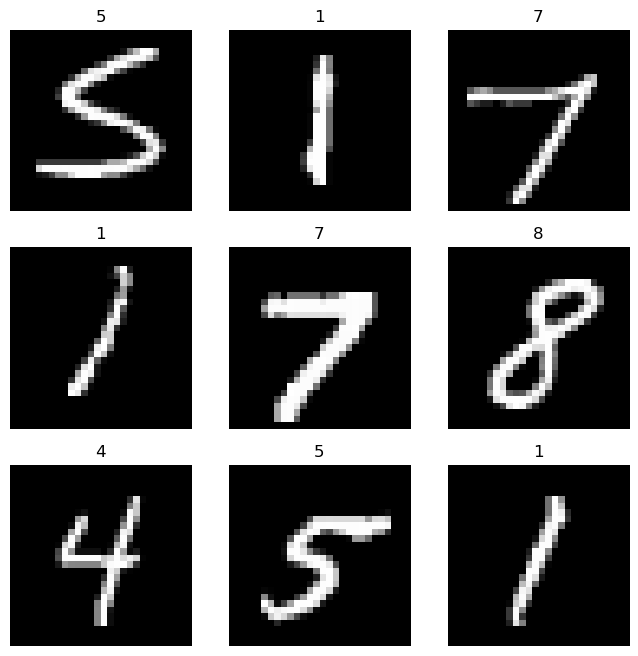

In [119]:
# example of accessing pairs of (image,lable)
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()